In [204]:
import numpy as np 
#NumPy: Bilimsel hesaplamalar için kullanılır. Veriler üzerinde hızlı matematiksel işlemler yapar ve çok boyutlu dizileri (array) yönetir.

import pandas as pd
#Pandas: Veri analizi ve veri manipülasyonu için kullanılır. Veri çerçeveleri (DataFrame) ile çalışarak veri setlerini kolayca işleyebilmeni sağlar.

import matplotlib.pyplot as plt
#Matplotlib: Veri görselleştirme kütüphanesi. Grafikler, çizimler ve görselleştirmeler oluşturmak için kullanılır.

import seaborn as sns
#Seaborn: Matplotlib üzerine inşa edilmiş daha gelişmiş bir veri görselleştirme kütüphanesi.

from sklearn.cluster import KMeans
#KMeans: K-means algoritmasını kullanarak verileri kümelere ayırmak için kullanılır. 
#Bu, kümeleme problemlerinde verileri benzer özelliklere göre gruplandırır.

from sklearn.pipeline import make_pipeline
#make_pipeline: Sklearn'deki modelleme adımlarını sıralı bir işlem olarak otomatikleştirir. 
#Örneğin, önce veriyi ölçeklendirme ve ardından bir model uygulama gibi adımları tek bir pipeline içinde gerçekleştirmek için kullanılır.

from sklearn.preprocessing import StandardScaler
#StandardScaler: Veriyi ölçeklendirmek için kullanılır. 
#Özellikle makine öğrenimi algoritmalarının verimli çalışması için veriyi standart normal dağılıma getirir (ortalama = 0, standart sapma = 1).

from scipy.cluster.hierarchy import linkage, dendrogram
#linkage: Hiyerarşik kümeleme için mesafe hesaplayan bir fonksiyon. 
#Veriler arasındaki mesafelere göre kümeleri oluşturur.

#dendrogram: Hiyerarşik kümeleme sonuçlarını görselleştirir. 
#Bir ağaç yapısı (dendrogram) kullanarak hangi verilerin hangi kümelerde yer aldığını gösterir.

import warnings
warnings.filterwarnings('ignore')
#Python'da oluşabilecek uyarı mesajlarını devre dışı bırakır. Genellikle çıktıyı temiz tutmak için kullanılır.

from sklearn.decomposition import PCA
#PCA (Principal Component Analysis): Boyut indirgeme tekniğidir. 
#Büyük veri setlerinde önemli olan bileşenleri (değişkenleri) bulur ve veriyi düşük boyutlu bir uzaya indirger. 
#Bu, veriyi daha basit hale getirir ve görselleştirmeyi kolaylaştırır.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [205]:
# natural-diamonds-prices-images verisetindeki birçok parttan oluşan verileri ayrı ayrı çektim.
df1 = pd.read_csv('/kaggle/input/natural-diamonds-prices-images/Diamonds2/data_emerald.csv')
df2 = pd.read_csv('/kaggle/input/natural-diamonds-prices-images/Diamonds2/data_princess.csv')
df3 = pd.read_csv('/kaggle/input/natural-diamonds-prices-images/Diamonds2/data_princess.csv')
df4 = pd.read_csv('/kaggle/input/natural-diamonds-prices-images/Diamonds2/data_pear.csv')
df5 = pd.read_csv('/kaggle/input/natural-diamonds-prices-images/Diamonds2/data_marquise.csv')
df6 = pd.read_csv('/kaggle/input/natural-diamonds-prices-images/Diamonds2/data_cushion.csv')
df7 = pd.read_csv('/kaggle/input/natural-diamonds-prices-images/Diamonds2/data_oval.csv')
df8 = pd.read_csv('/kaggle/input/natural-diamonds-prices-images/Diamonds2/data_round.csv')

# VERİ ÖN İŞLEME

In [206]:
# DataFrame'leri tek bir DataFrame'de birleştirdim.
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], ignore_index=True)

# Birleştirilen veri setinin ilk birkaç satırını görüntüledim.
df.head()

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price
0,1760508,EMERALD,0.3,VVS2,D,EX,EX,GD,N,4.68-3.16×2.15,973.78
1,1794389,EMERALD,0.3,VVS2,E,VG,VG,GD,N,4.62-3.19×2.03,974.29
2,1794388,EMERALD,0.3,VVS2,E,VG,VG,GD,N,4.75-3.06×2.09,974.29
3,1799836,EMERALD,0.3,VS1,D,VG,EX,VG,N,4.35-3.27×2.22,974.29
4,1800651,EMERALD,0.3,VS1,D,VG,VG,GD,N,4.40-3.28×2.25,974.29


In [207]:
#Id değişkeninin modelimde bir amaca hizmet etmeyeceğini düşünerek verisetinden çıkardım.
df.drop(['Id'],axis=1,inplace=True)

In [208]:
df

,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price
0,EMERALD,0.30,VVS2,D,EX,EX,GD,N,4.68-3.16×2.15,973.78
1,EMERALD,0.30,VVS2,E,VG,VG,GD,N,4.62-3.19×2.03,974.29
2,EMERALD,0.30,VVS2,E,VG,VG,GD,N,4.75-3.06×2.09,974.29
3,EMERALD,0.30,VS1,D,VG,EX,VG,N,4.35-3.27×2.22,974.29
4,EMERALD,0.30,VS1,D,VG,VG,GD,N,4.40-3.28×2.25,974.29
...,...,...,...,...,...,...,...,...,...,...
6613,ROUND,0.50,SI1,E,EX,EX,EX,N,5.00-5.04×3.18,"2,453.10"
6614,ROUND,0.50,SI1,E,EX,EX,EX,N,5.03-5.06×3.16,"2,453.10"
6615,ROUND,0.50,VS2,D,VG,EX,VG,N,4.93-4.96×3.19,"2,453.20"
6616,ROUND,0.52,SI1,H,EX,EX,EX,N,5.11-5.13×3.20,"2,453.41"


Pırlantalarda measurement (ölçüm) olarak verilen x, y, z ekseni değerleri, taşın fiziksel boyutlarını ifade eder. Bunlar pırlantanın üç ana eksendeki ölçüleridir ve genellikle milimetre cinsinden belirtilir. Her eksen, pırlantanın farklı bir boyutunu temsil eder:

X ekseni (Uzunluk): Pırlantanın uzun kenarını (örneğin, bir elmasın üstten bakıldığında en uzun yatay genişliğini) ifade eder.

Y ekseni (Genişlik): Pırlantanın genişliğini, yani pırlantanın x eksenine dik olarak ölçülen yatay boyutunu ifade eder. Bu da pırlantanın daha dar olan tarafıdır.

Z ekseni (Derinlik): Pırlantanın yukarıdan aşağıya olan dikey ölçüsüdür. Z ekseni, pırlantanın tepe (taç kısmı) ile alt kısmı (külah kısmı) arasındaki yüksekliği veya derinliği ifade eder.

Verisetindeki Messurements değişkeninde değerler x y z için tek bir satırda yanyana birleşik verilmiş. Bu yüzden bu değerleri integer'a çevirmek için x,y,z için 3 ayrı sütun oluşturdum.

In [209]:
# Measurements sütunundaki değerleri ayırma
df[['x', 'y', 'z']] = df['Messurements'].str.extract(r'(\d+\.\d+)-(\d+\.\d+)×(\d+\.\d+)')

# Yeni sütunları float tipine dönüştürme
df['x'] = df['x'].astype(float)
df['y'] = df['y'].astype(float)
df['z'] = df['z'].astype(float)

In [210]:
# Measurements sütununu kaldırma
df = df.drop('Messurements', axis=1)

# Sonuçları kontrol etme
print(df.head())

     Shape  Weight Clarity Colour Cut Polish Symmetry Fluorescence   Price  \
0  EMERALD     0.3    VVS2      D  EX     EX       GD            N  973.78   
1  EMERALD     0.3    VVS2      E  VG     VG       GD            N  974.29   
2  EMERALD     0.3    VVS2      E  VG     VG       GD            N  974.29   
3  EMERALD     0.3     VS1      D  VG     EX       VG            N  974.29   
4  EMERALD     0.3     VS1      D  VG     VG       GD            N  974.29   

      x     y     z  
0  4.68  3.16  2.15  
1  4.62  3.19  2.03  
2  4.75  3.06  2.09  
3  4.35  3.27  2.22  
4  4.40  3.28  2.25  


In [211]:
#Bu çıktıda, 6618 satır ve 12 sütundan oluşan bir Pandas DataFrame yapısının özelliklerini görmekteyiz.
#Her sütunun ismi, eksik veri sayısı ve veri tipi gösteriliyor.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6618 entries, 0 to 6617
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Shape         6618 non-null   object 
 1   Weight        6618 non-null   float64
 2   Clarity       6598 non-null   object 
 3   Colour        6618 non-null   object 
 4   Cut           6616 non-null   object 
 5   Polish        6617 non-null   object 
 6   Symmetry      6611 non-null   object 
 7   Fluorescence  6616 non-null   object 
 8   Price         6618 non-null   object 
 9   x             6566 non-null   float64
 10  y             6566 non-null   float64
 11  z             6566 non-null   float64
dtypes: float64(4), object(8)
memory usage: 620.6+ KB


Veri seti genelde metin (object) ve ondalıklı (float64) sayılar içeriyor.
Bazı sütunlarda eksik değerler var. Örneğin, Clarity sütununda 20 eksik veri var, x, y, z sütunlarında ise 52 eksik veri var.
Price sütunu object türünde, yani fiyatlar metinsel formatta tutuluyor. Bu sütun üzerinde sayısal analiz yapmak için bu verileri önce float formatına çevirmek gerekir.
Açıkçası eksik veriler toplam veri sayısının %5'inden az sayıda olduğundan göz ardı edeceğim.

In [212]:
# Gözardı etmeseydik; Eksik değer içeren satırları kaldırma
#df = df.dropna()
#Eksik değer içeren sütunları kaldırma
#df = df.dropna(axis=1)
#Kodları ile yapabilirdik.

In [213]:
df.isnull()

,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Price,x,y,z
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6613,False,False,False,False,False,False,False,False,False,False,False,False
6614,False,False,False,False,False,False,False,False,False,False,False,False
6615,False,False,False,False,False,False,False,False,False,False,False,False
6616,False,False,False,False,False,False,False,False,False,False,False,False


Aşağıda;
* LabelEncoder: Kategorik verileri sayısal değerlere dönüştürmek için kullanılan bir sınıf. Her benzersiz kategoriye bir tam sayı atanır.
* LE: LabelEncoder nesnesini oluşturuyoruz. Bu nesne, verilerin kodlanması için kullanılacak.
* label_dict: Her kategorik sütunun orijinal değerleri ile kodlanmış değerlerini saklamak için boş bir sözlük oluşturuyoruz.
* for döngüsüyle kodlamak istediğim kategorik sütunların isimlerini içeren bir liste üzerinde işlem yapılıyor.
* fit_transform: Bu yöntem, belirli bir sütundaki kategorik değerleri alır, her benzersiz değere bir tam sayı atar ve bu sayıları DataFrame'e geri döndürür. Örneğin, "Round" -> 0, "Princess" -> 1 gibi.
* label_dict[i]  satırı, her sütunun orijinal değerlerini ve karşılık gelen kodlanmış değerlerini bir sözlükte saklıyor.
* LE.classes_: Kategorik sütundaki benzersiz değerlerin listesini döndürür.
* LE.transform(LE.classes_): Bu sınıf değerlerini sayısal değerlere dönüştürür.
* zip: İki listeyi birleştirir; böylece her orijinal değeri ve karşılık gelen kodlanmış değeri birleştirerek bir sözlük oluşturur.


In [214]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
label_dict = {}
for i in ['Shape','Clarity','Colour','Cut','Polish','Symmetry','Fluorescence']:
    df[i] = LE.fit_transform(df[i])
    label_dict[i] = {label:encoded_label for label, encoded_label in zip(LE.classes_,LE.transform(LE.classes_))}

In [215]:
label_dict
#Oluşturduğum sözlükte hangi veriye hangi sayısal değeri atadım onları kayıt altına aldım ki geri döndüğümde hatırlayabileyim.

{'Shape': {'CUSHION': 0,
  'EMERALD': 1,
  'MARQUISE': 2,
  'OVAL': 3,
  'PEAR': 4,
  'PRINCESS': 5,
  'ROUND': 6},
 'Clarity': {'FL': 0,
  'I1': 1,
  'I2': 2,
  'I3': 3,
  'IF': 4,
  'SI1': 5,
  'SI2': 6,
  'VS1': 7,
  'VS2': 8,
  'VVS1': 9,
  'VVS2': 10,
  nan: 11},
 'Colour': {'D': 0,
  'E': 1,
  'F': 2,
  'FANCY': 3,
  'G': 4,
  'H': 5,
  'I': 6,
  'J': 7,
  'K': 8,
  'L': 9,
  'M': 10,
  'N': 11,
  'O': 12,
  'O-P': 13,
  'Q-R': 14,
  'S-T': 15,
  'U-V': 16,
  'W': 17,
  'W-X': 18,
  'Y-Z': 19},
 'Cut': {'EX': 0, 'F': 1, 'GD': 2, 'VG': 3, nan: 4},
 'Polish': {'EX': 0, 'F': 1, 'GD': 2, 'VG': 3, nan: 4},
 'Symmetry': {'EX': 0, 'FR': 1, 'GD': 2, 'VG': 3, nan: 4},
 'Fluorescence': {'F': 0,
  'M': 1,
  'N': 2,
  'SL': 3,
  'ST': 4,
  'VS': 5,
  'VSL': 6,
  nan: 7}}

In [216]:
# Bu kodlar, Price sütunundaki tüm virgülleri kaldırır. Örneğin, "1,000" ifadesini "1000" haline getirir.
# Virgülleri kaldırma
df['Price'] = df['Price'].str.replace(',', '', regex=False)

# Sayısal türüne dönüştürme
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Sonuçları kontrol etme
print(df)

      Shape  Weight  Clarity  Colour  Cut  Polish  Symmetry  Fluorescence  \
0         1    0.30       10       0    0       0         2             2   
1         1    0.30       10       1    3       3         2             2   
2         1    0.30       10       1    3       3         2             2   
3         1    0.30        7       0    3       0         3             2   
4         1    0.30        7       0    3       3         2             2   
...     ...     ...      ...     ...  ...     ...       ...           ...   
6613      6    0.50        5       1    0       0         0             2   
6614      6    0.50        5       1    0       0         0             2   
6615      6    0.50        8       0    3       0         3             2   
6616      6    0.52        5       5    0       0         0             2   
6617      6    0.50        7       5    0       0         3             2   

        Price     x     y     z  
0      973.78  4.68  3.16  2.15  
1      

In [217]:
# Veri tiplerini kontrol etme
print(df.dtypes)


Shape             int64
Weight          float64
Clarity           int64
Colour            int64
Cut               int64
Polish            int64
Symmetry          int64
Fluorescence      int64
Price           float64
x               float64
y               float64
z               float64
dtype: object


# 1. GÖZETİMSİZ ÖĞRENME

# Keşifsel Veri Analizi (EDA - Exploratory Data Analysis) 

AŞAĞIDA PRİCE DEĞİŞKENİNE ETKİLERİNİ MERAK ETTİĞİM BİRKAÇ DEĞİŞKEN İÇİN GRAFİKLER OLUŞTURDUM.

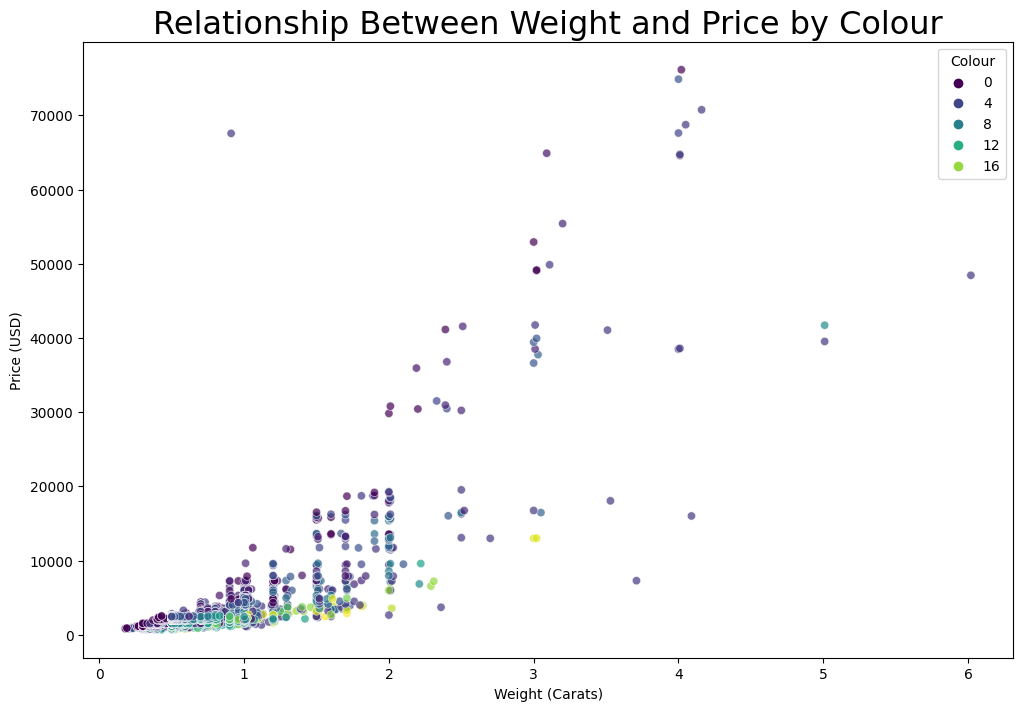

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
plt.title('Relationship Between Weight and Price by Colour', fontsize=23)
sns.scatterplot(data=df, x='Weight', y='Price', hue='Colour', palette='viridis', alpha=0.7)
plt.xlabel('Weight (Carats)')
plt.ylabel('Price (USD)')
plt.legend(title='Colour')
plt.show()


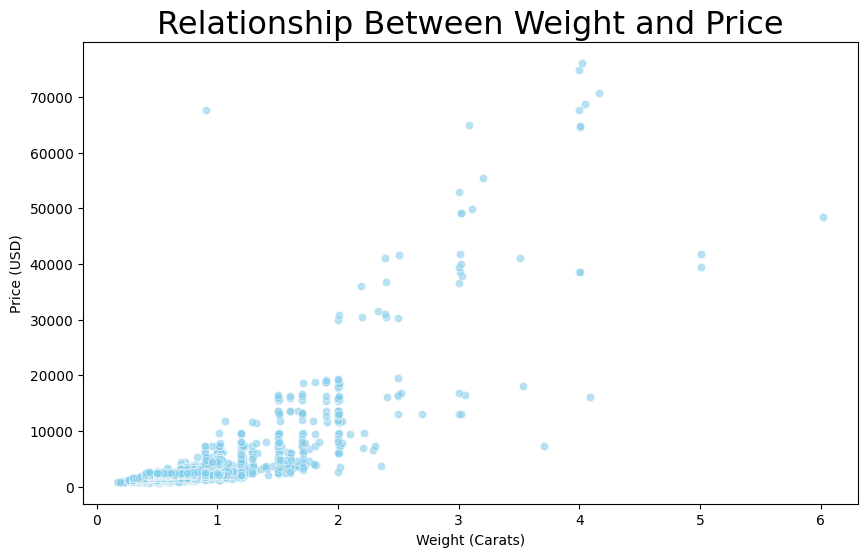

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.title('Relationship Between Weight and Price', fontsize=23)
sns.scatterplot(data=df, x='Weight', y='Price', color='skyblue', alpha=0.6)
plt.xlabel('Weight (Carats)')
plt.ylabel('Price (USD)')
plt.show()


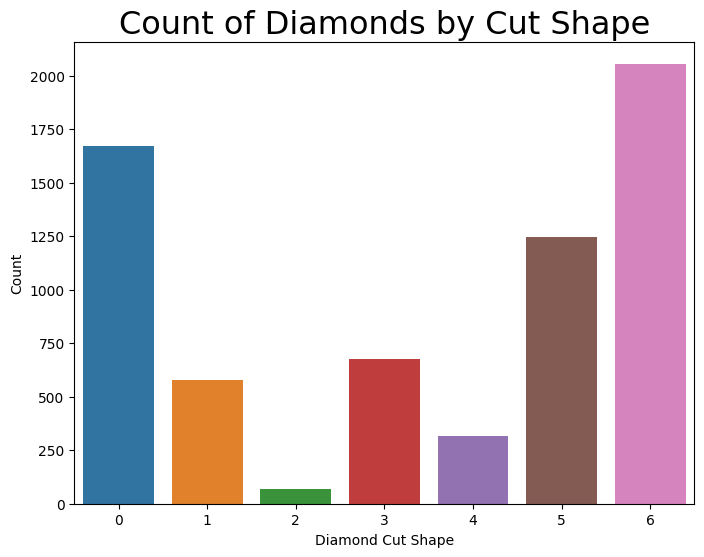

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.title('Count of Diamonds by Cut Shape', fontsize=23)
sns.countplot(data=df, x='Shape')
plt.xlabel('Diamond Cut Shape')
plt.ylabel('Count')
plt.show()


* Korelasyon matrisinin analizi, değişkenler arasındaki ilişkileri anlamamıza yardımcı olur. Pozitif korelasyon (1'e yakın) iki değişkenin birlikte artma eğiliminde olduğunu gösterirken, negatif korelasyon (-1'e yakın) birinin artarken diğerinin azaldığını gösterir. Korelasyon, neden-sonuç ilişkisini göstermez, sadece iki değişken arasındaki ilişkiyi tanımlar.
* Aşağıda Weight ve Shape değişkenleri arasında negatif yönlü, Weight ve Price değişkenleri arasında ise pozitif yönlü ilişkiler en çok dikkat çeken noktalardır.

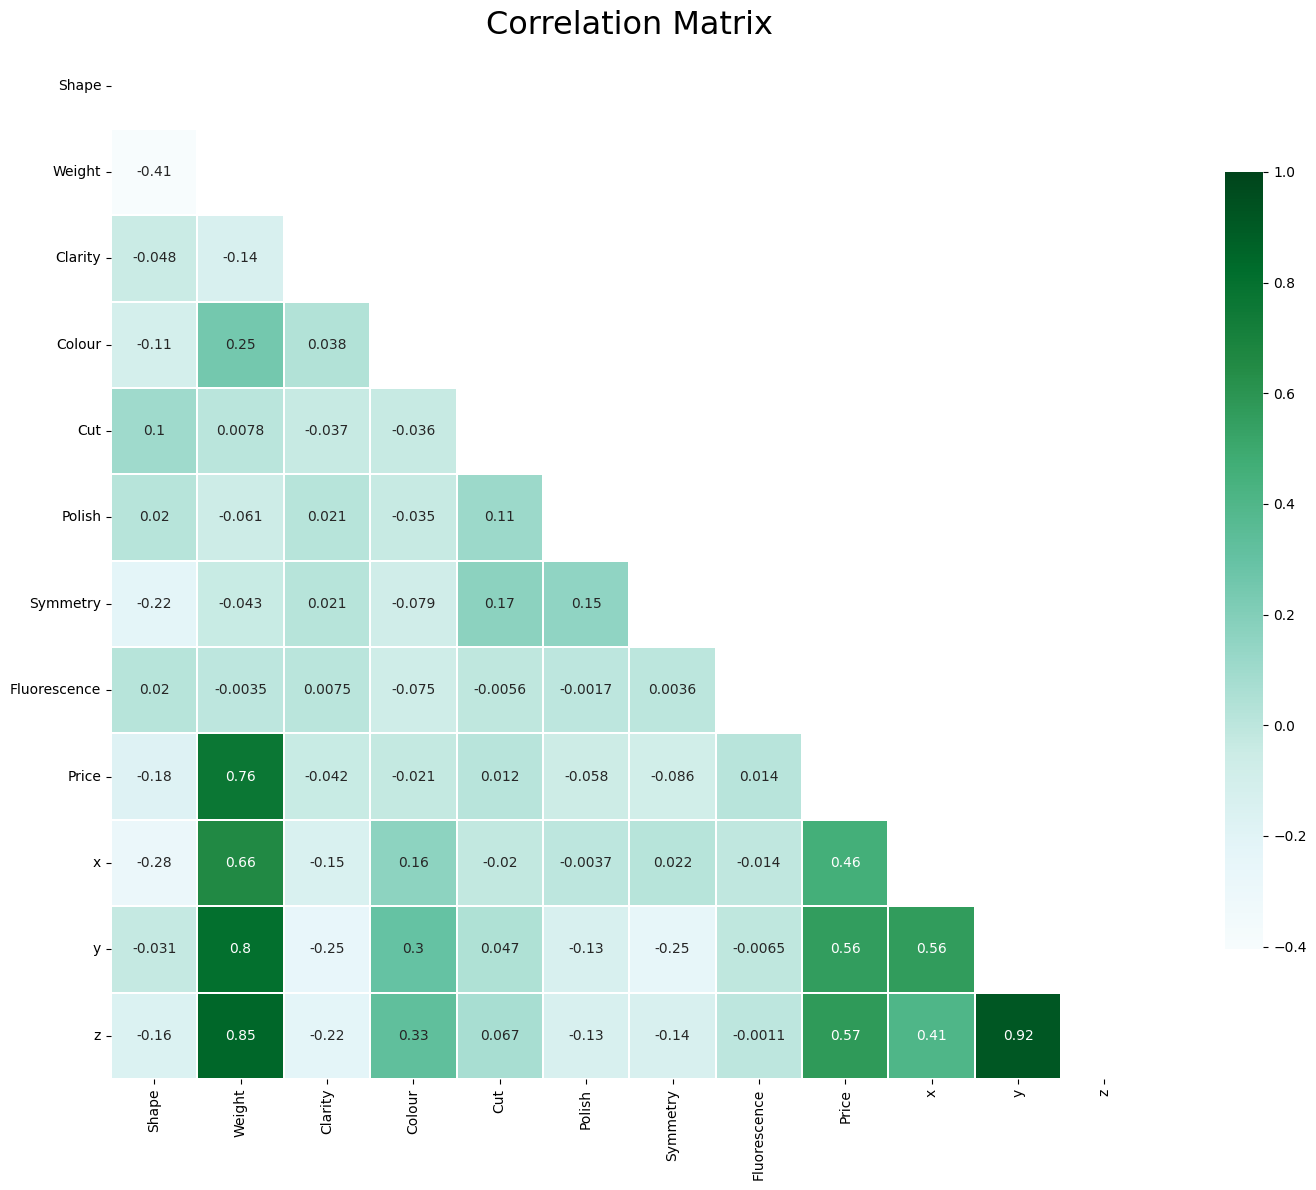

In [221]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# mask için np.bool yerine np.bool_ kullanılması
mask = np.zeros_like(df.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Korelasyon matrisinin çizimi
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Correlation Matrix', fontsize=23)

sns.heatmap(df.corr(), linewidths=0.25, vmax=1.0, square=True, cmap="BuGn",
            linecolor='w', annot=True, mask=mask, cbar_kws={"shrink": .75})

f.tight_layout()
plt.show()


In [222]:
# StandardScaler, sklearn kütüphanesinden gelir ve verilerin ortalamasını 0, standart sapmasını 1 olacak şekilde ölçeklendirmeyi sağlar.
scaler = StandardScaler()
df_dropped = df.drop('Price', axis=1)
X = df_dropped.values[:, 1:]
scaled_x = scaler.fit_transform(X)

In [223]:
import pandas as pd
X_df = pd.DataFrame(X)

# Eksik değerleri sütunların ortalama değerleriyle doldurdum.
X_df = X_df.fillna(X_df.mean())


In [224]:
#X_df DataFrame'indeki tüm kategorik değişkenler için "one-hot encoding" işlemi uygular. 
#Her bir benzersiz kategori için yeni bir sütun oluşturur ve o sütun içinde, o kategoriye aitse 1, değilse 0 değerlerini atar.

X_df = pd.get_dummies(X_df)


# Algoritma Seçimi & Hiperparametre Optimizasyonu

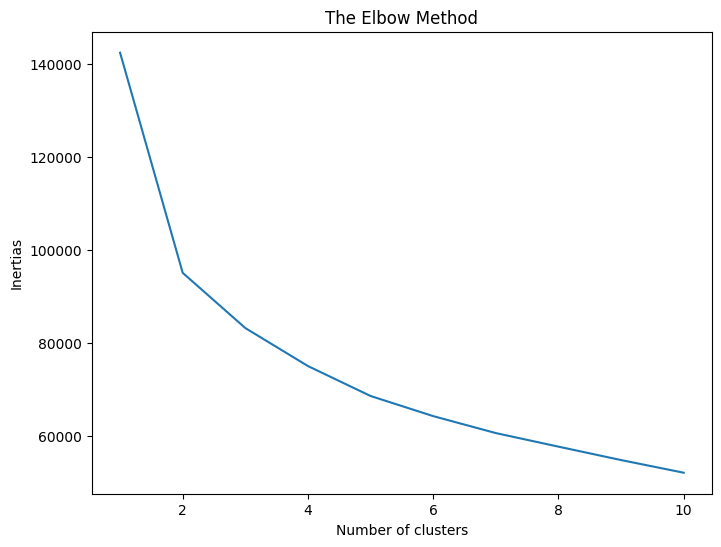

In [225]:
# KMeans kümeleme algoritmasının optimal küme sayısını belirlemek için Elbow yöntemini kullandım. 2 olduğunu gözlemledim.

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X_df)  # X yerine X_df kullanıyoruz
    inertias.append(kmeans.inertia_)

# Elbow grafiği çizimi
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.show()


In [226]:
import numpy as np

# Eksik değerleri kontrol etme
if np.isnan(scaled_x).any():
    print("Eksik değerler var")
else:
    print("Eksik değerler yok")


Eksik değerler var


In [227]:
# Eksik değerleri doldur
scaled_x = np.nan_to_num(scaled_x)


In [228]:
model = KMeans(n_clusters=2)
training_points = scaled_x[:1000]
test_points = scaled_x[1000:]
model.fit(training_points)
labels = model.predict(test_points)

In [229]:
import numpy as np

# Eksik değerleri kontrol et
if np.isnan(X).any():
    print("Eksik değerler var")
    # Eksik değerleri ortalama ile doldur
    X = np.nan_to_num(X)
else:
    print("Eksik değerler yok")


Eksik değerler var


In [230]:
import numpy as np

# Eğer X NumPy ndarray değilse dönüştür
X = np.array(X)


In [231]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


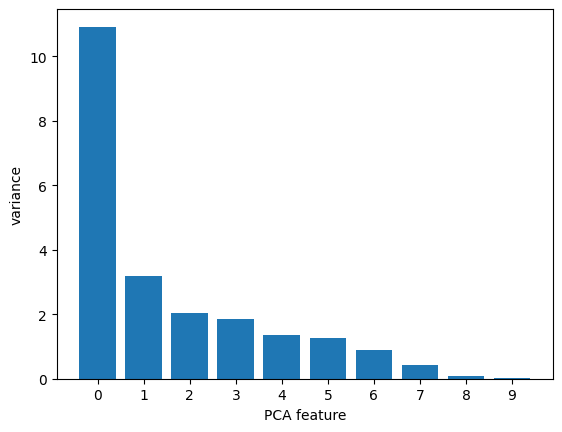

In [232]:
pca = PCA()
pca.fit(X)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [233]:
pca = PCA(n_components=7)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.49629902 0.14514105 0.09247529 0.08383918 0.06213338 0.05682323
 0.04021645]
0.9769276007741783


**Modelin başarı oranı yaklaşık %98**

In [234]:
pca = PCA(n_components=7)  # Örneğin, ilk 7 ana bileşeni alıyoruz
pca_features = pca.fit_transform(X_scaled)  # PCA uygulanmış özellikler


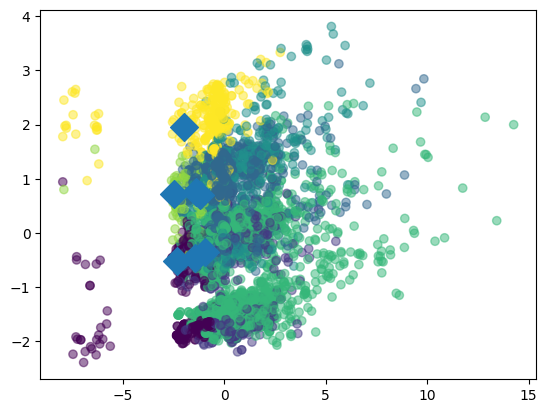

In [235]:
model = KMeans(n_clusters=7)
training_points = pca_features[:1000]
test_points = pca_features[1000:]
model.fit(training_points)
labels = model.predict(test_points)
xs = test_points[:,0]
ys = test_points[:,1]

plt.scatter(xs, ys, c=labels, alpha=0.5)

centroids = model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(centroids_x, centroids_y, marker='D',s=200)
plt.show()

# 2.  GÖZETİMLİ ÖĞRENME

In [236]:
# Hedef değişkeni ve özellikleri belirleme
# 'Price' sütunu hedef değişken
X = df.drop('Price', axis=1)  # 'Price' hariç tüm sütunlar özellik olarak seçildi
y = df['Price']  # 'Price' hedef değişken

In [237]:
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

# Eğitim ve test veri setlerinin yüzdesini belirleme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Yukarıdaki kodda test_size=0.2 olarak belirlendi. Bu, verilerin %20'sinin test, %80'inin eğitim için kullanılacağı anlamına gelir.


# Model listesini ve sonuçları içeren DataFrame'i tanımlama
models = [XGBRegressor(), LGBMRegressor()]

scores_list = []

for model in models:
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    score = model.score(X_test, y_test)
    scores_list.append({
        'Model': type(model).__name__,
        'Score': score,
        'Time': end - start
    })
    print(f"{type(model).__name__} - {score}")

# DataFrame oluşturma
scores_df = pd.DataFrame(scores_list)

# Sonuçları kontrol etme
print(scores_df)

XGBRegressor - 0.9401558221702322
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 936
[LightGBM] [Info] Number of data points in the train set: 5294, number of used features: 11
[LightGBM] [Info] Start training from score 2429.202217
LGBMRegressor - 0.9046358873426898
           Model     Score      Time
0   XGBRegressor  0.940156  0.189313
1  LGBMRegressor  0.904636  0.163497


In [238]:
scores_df.sort_values(by="Score",ascending=False)

,Model,Score,Time
0,XGBRegressor,0.940156,0.189313
1,LGBMRegressor,0.904636,0.163497


# MODELLERİN DEĞERLENDİRİLMESİ
# SONUÇ; 
* Gözetimsiz öğrenme yöntemlerinden K-Means ile modelin başarı oranı yaklaşık %98,
* Gözetimli öğrenme yöntemlerinden XGBRegressor %94, LGBMRegressor ise %90 başarı oranına sahiptir.
* Bu veriseti için K-Means yönteminin daha başarılı sonuçlar sağladığı gözlemlenmiştir.